In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation = gold_data.corr()

C:\Users\ruhan\AppData\Local\Temp\ipykernel_10608\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

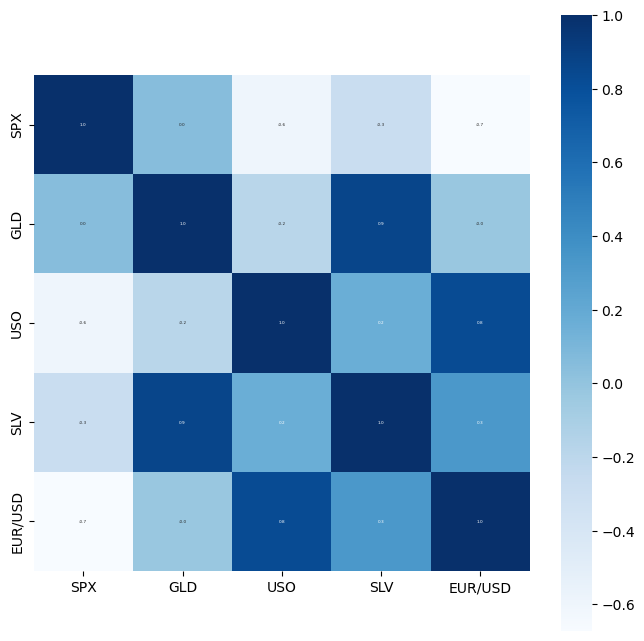

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':3}, cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ruhan\AppData\Local\Temp\ipykernel_10608\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

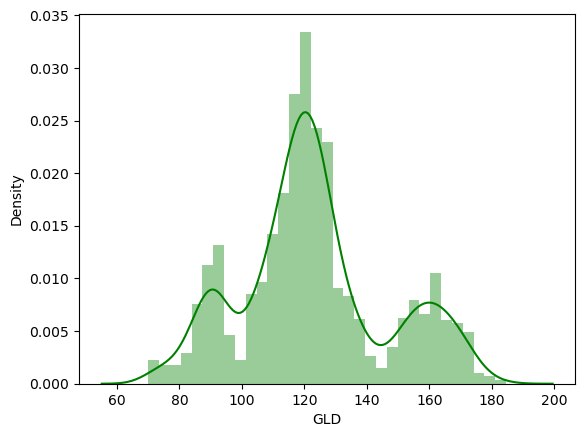

In [13]:
sns.distplot(gold_data['GLD'],color='green')

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.55779929  82.12059983 115.92690031 127.69040066 120.87500111
 154.55709838 149.98469917 126.14470039 117.50359885 125.85400094
 116.83630087 171.83760068 142.07409841 167.85589943 115.05820001
 117.95300057 138.19380326 170.0927009  159.38570303 158.68120013
 155.11110023 125.06580026 176.5814999  157.52980318 125.21080023
  93.73309978  77.40359985 120.21089986 119.20839992 167.48209959
  88.15050043 125.39600009  91.21360081 117.68670017 121.0346997
 137.08080057 115.44780131 115.2680009  147.34709957 107.23180129
 104.14730253  87.16489806 126.53890029 118.05449993 153.33869936
 119.76239999 108.26689993 107.93119806  93.22000054 127.10239788
  74.99040054 113.4710992  121.51390005 111.502399   118.83519875
 120.50789939 159.47740041 167.81490142 147.22819669  85.67549838
  94.2982005   86.81279909  90.49920002 119.09310047 126.47140084
 127.69079977 169.57280046 122.34119932 117.38429903  98.44970021
 168.07260152 142.91679861 132.07340283 121.21430221 121.56079933
 119.649500

In [22]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989306758518943


In [23]:
Y_test = list(Y_test)

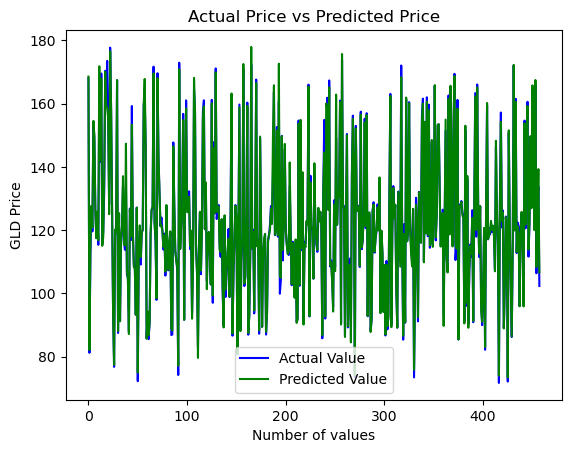

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()